# Функции и библиотеки

In [1]:
from graphlib.structures import Graph, Digraph
import graphlib.algorithms as alg 
import graphlib.tools as tls

from time import time
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
sns.set(font_scale = 1.2)

random.seed(0)

# Загрузка данных, количество ребер и вершин; плотность

In [2]:
%%time

G = Digraph('Google')
with open('datasets/web-Google.txt', 'r') as f:
    for line in f:        
        u, v = line.split()
        G.add_edge(u, v)

CPU times: total: 6.56 s
Wall time: 6.56 s


In [4]:
print(G)

Ориентированный граф <Google> с 875713 вершинами and 5105039 ребрами


# Выделение компонент сильной и слабой связности

In [4]:
%%time
number, largest_index, wcc = alg.weakly_components(G, largest=True)

Wall time: 9.9 s


In [5]:
print(f'Число компонент слабой связности - {number}')

largest_weak_component = G.subgraph(nodes=wcc[largest_index])
print(f'Наибольшая компонента связности: {largest_weak_component.nodes_count} вершин и {largest_weak_component.edges_count} ребер')

Число компонент слабой связности - 2746
Наибольшая компонента связности: 855802 вершин и 5066842 ребер


In [6]:
%%time
scc = list(alg.strongly_components_tarjan(G))

Wall time: 7.5 s


In [7]:
print('Число компонент сильной связности: ', len(scc))

largest_strong_component = G.subgraph(nodes=list(max(scc, key=lambda elem: len(elem))))
print(f'Наибольшая компонента сильной связности состоит из {largest_strong_component.nodes_count} вершин и {largest_strong_component.edges_count} ребер')
print(f'Доля вершин в наибольшей компоненте сильной связности: {round(largest_strong_component.nodes_count / G.nodes_count, 3)}')

Число компонент сильной связности:  371764
Наибольшая компонента сильной связности состоит из 434818 вершин и 3419124 ребер
Доля вершин в наибольшей компоненте сильной связности: 0.497


# Мета-граф

In [8]:
%%time
C = alg.meta_graph(G, scc)

Wall time: 2min


In [9]:
print(C)

Ориентированный граф <meta-graph::Google> с 371764 вершинами and 517805 ребрами


# Перевод в неориентированный граф для дальнейшего анализа

In [3]:
%%time
# перевод в неориентированный граф
G = G.to_simple()

CPU times: total: 7.31 s
Wall time: 7.31 s


In [11]:
print(G)
print(f'Плотность графа: {tls.density(G)}')

Граф <неориентированный граф, лежащий в основе Google> с 875713 вершинами and 4322051 ребрами
Плотность графа: 1.1271891119695635e-05


# Количество компонент связности, характеристики наибольшей компоненты

In [12]:
%%time

number, largest_index, components = alg.DFS_with_cc(G, largest=True)
largest_component = G.subgraph(nodes=components[largest_index])

Wall time: 9.57 s


In [13]:
print(f'Количество компонент связности - {number}')
print(f'Наибольшая компонента связности: {largest_component.nodes_count} вершин и {largest_component.edges_count} ребер',)

Количество компонент связности - 2746
Наибольшая компонента связности: 855802 вершин и 4291352 ребер


In [14]:
nodes_in_largest_component = largest_component.nodes
print(f'Доля вершин в наибольшей компоненте слабой связности: {round(largest_component.nodes_count / G.nodes_count, 3)}')

Доля вершин в наибольшей компоненте слабой связности: 0.977


## Доля вершин в текущей компоненте слабой связности при удалении x% случайных вершин

Wall time: 7.08 s


Text(0, 0.5, 'Доля вершин в наибольшей компоненте')

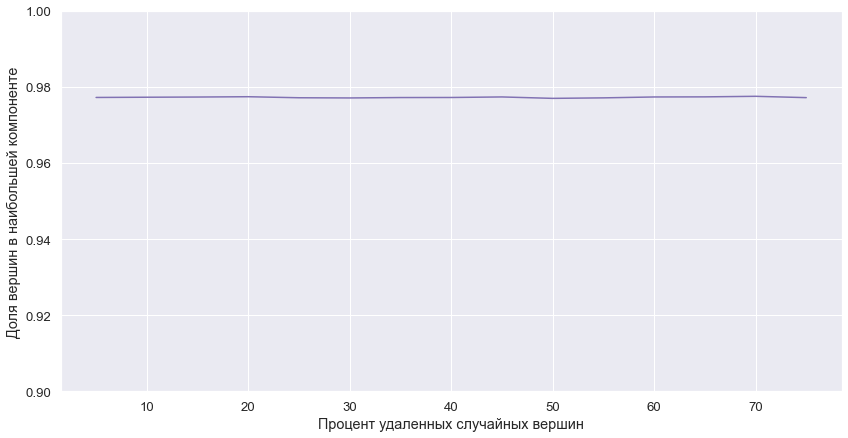

In [15]:
%%time

procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    n = round(G.nodes_count * (x/100)) # число удаляемых вершин
    removing_nodes = G.selection(x=n,
                                 most_degree=False)
    tmp_set = nodes_in_largest_component - removing_nodes
    proportion = len(tmp_set) / (G.nodes_count-n)
    props.append(proportion)
    

plt.figure(figsize=(14, 7))
plt.plot(procent_of_removing, props, 'm')
plt.ylim(0.9, 1)
plt.xlabel('Процент удаленных случайных вершин')
plt.ylabel('Доля вершин в наибольшей компоненте')

## Доля вершин в новой наибольшей компоненте слабой связности при удалении x% случайных вершин

Text(0, 0.5, 'Доля вершин в наибольшей компоненте')

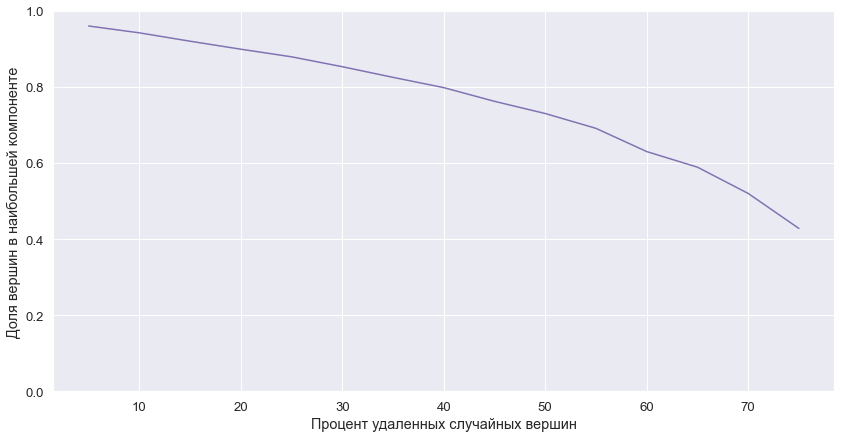

In [16]:
procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    # удаление вершин
    n = round(G.nodes_count * (x/100))
    removing_nodes = G.selection(x=n,
                                 most_degree=False)
    tmp_set = G.nodes - removing_nodes
    
    # выделение новой компоненты
    G_after_removing = G.subgraph(nodes=tmp_set)
    _, largest_i, cc = alg.DFS_with_cc(G_after_removing, largest=True)
    largest_c = G_after_removing.subgraph(nodes=cc[largest_i])
    
    # подсчет доли
    proportion = round(largest_c.nodes_count / G_after_removing.nodes_count, 3)
    props.append(proportion)

plt.figure(figsize=(14, 7))
plt.plot(procent_of_removing, props, 'm')
plt.ylim(0, 1)
plt.xlabel('Процент удаленных случайных вершин')
plt.ylabel('Доля вершин в наибольшей компоненте')

## Доля вершин в текущей компоненте слабой связности при удалении x% вершин наибольшей степени

Wall time: 14.8 s


Text(0, 0.5, 'Доля вершин в наибольшей компоненте')

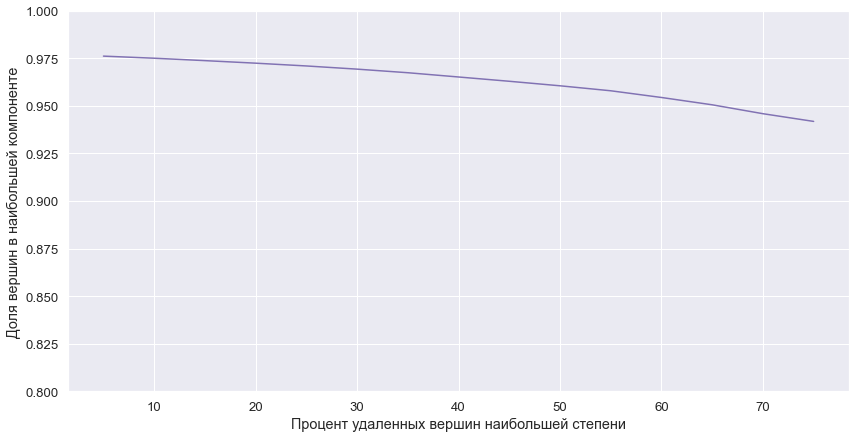

In [17]:
%%time

procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    n = round(G.nodes_count * (x/100)) # число удаляемых вершин
    removing_nodes = G.selection(x=n,
                                 most_degree=True)
    tmp_set = nodes_in_largest_component - removing_nodes
    proportion = len(tmp_set) / (G.nodes_count-n)
    props.append(proportion)
    

plt.figure(figsize=(14, 7))
plt.plot(procent_of_removing, props, 'm')
plt.ylim(0.8, 1)
plt.xlabel('Процент удаленных вершин наибольшей степени')
plt.ylabel('Доля вершин в наибольшей компоненте')

## Доля вершин в новой наибольшей компоненте слабой связности при удалении x%   вершин наибольшей степени

Text(0, 0.5, 'Доля вершин в наибольшей компоненте')

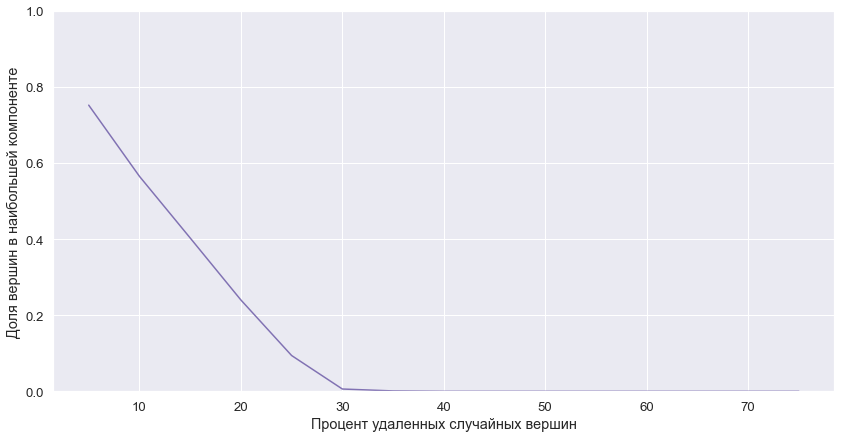

In [18]:
procent_of_removing = np.arange(5, 80, 5) # от 5 до 75 с шагом 5
props = []
for x in procent_of_removing:
    # удаление вершин
    n = round(G.nodes_count * (x/100))
    removing_nodes = G.selection(x=n,
                                 most_degree=True)
    tmp_set = G.nodes - removing_nodes
    
    # выделение новой компоненты
    G_after_removing = G.subgraph(nodes=tmp_set)
    _, largest_i, cc = alg.DFS_with_cc(G_after_removing, largest=True)
    largest_c = G_after_removing.subgraph(nodes=cc[largest_i])
    
    # подсчет доли
    proportion = round(largest_c.nodes_count / G_after_removing.nodes_count, 3)
    props.append(proportion)

plt.figure(figsize=(14, 7))
plt.plot(procent_of_removing, props, 'm')
plt.ylim(0, 1)
plt.xlabel('Процент удаленных случайных вершин')
plt.ylabel('Доля вершин в наибольшей компоненте')

# Метрические характеристики графа: диаметр, радиус и 90 процентиль (approximation)

In [19]:
%%time

diam, radius, percentile = tls.approximate_statistic(graph=largest_component, number=500, percent=90)

Wall time: 24min 40s


In [20]:
print(f'Диаметр наибольшей компоненты (приближенно): {diam}')
print(f'Радиус наибольшей компоненты (приближенно): {radius}')
print(f'90% процентиль геодезического расстояния в наибольшей компоненте (приближенно): {percentile}')

Диаметр наибольшей компоненты (приближенно): 21
Радиус наибольшей компоненты (приближенно): 14
90% процентиль геодезического расстояния в наибольшей компоненте (приближенно): 9


# Функция вероятности для степени узла в графе
Минимальная, максимальная, средняя степень узла в графе. Надо построить функцию вероятности (можно в виде гистограммы относительных частот)

In [21]:
%%time
degrees = list(map(lambda elem: elem[1], list(G.node_degrees())))
max_deg = max(degrees)
min_deg = min(degrees)
mean_deg = int(sum(degrees)/ len(degrees))

Wall time: 3.21 s


In [22]:
print('Максимальная степень узла:', max(degrees))
print('Минимальная степень узла:', min(degrees))
print('Средняя степень узла:', int(sum(degrees)/len(degrees)))

Максимальная степень узла: 6332
Минимальная степень узла: 1
Средняя степень узла: 9


Text(0, 0.5, 'Количество вершин')

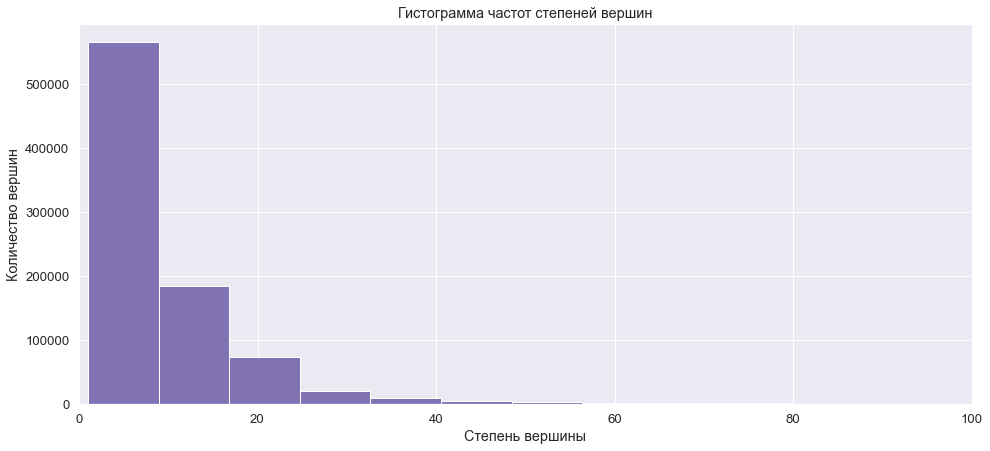

In [23]:
plt.figure(figsize=(16, 7))
plt.hist(np.array(degrees), bins=800, color='m')
plt.title('Гистограмма частот степеней вершин')
plt.xlim(0, 100)
plt.xlabel('Степень вершины')
plt.ylabel('Количество вершин')

Text(0, 0.5, 'Вероятность')

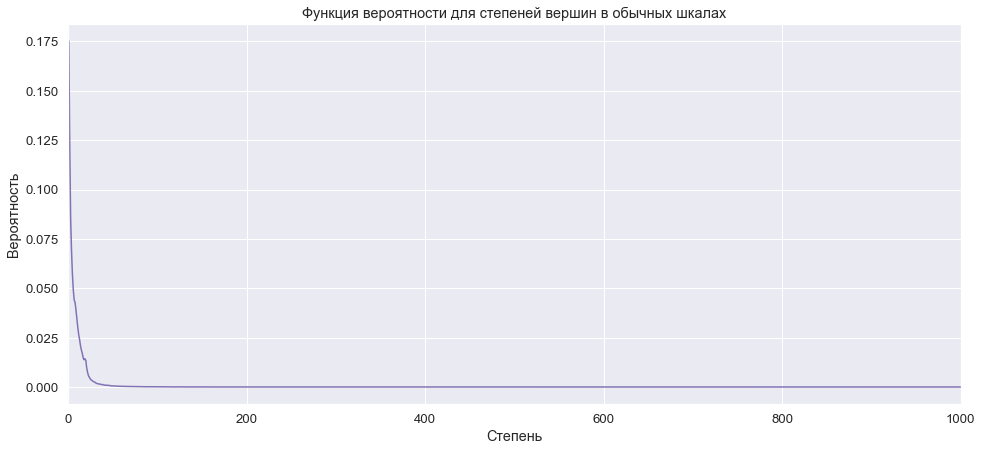

In [24]:
plt.figure(figsize=(16, 7))
x_axis = np.arange(min_deg, max_deg+1)
y_axis = np.bincount(degrees) / G.nodes_count
y_axis = y_axis[min_deg:] # не учитываем нулевую степень
plt.plot(x_axis, y_axis, c='m')

plt.xlim(0, 1000)
plt.title('Функция вероятности для степеней вершин в обычных шкалах')
plt.xlabel('Степень')
plt.ylabel('Вероятность')

Text(0, 0.5, 'Вероятность')

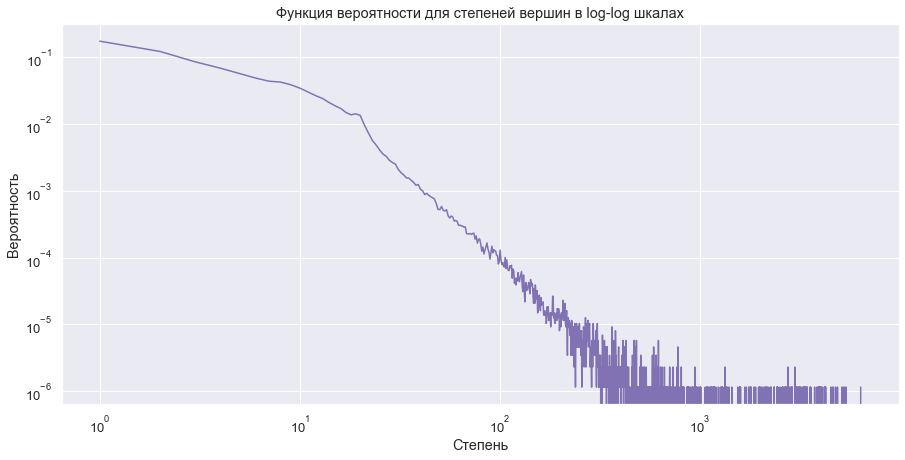

In [25]:
plt.figure(figsize=(15,7))
plt.loglog(x_axis, y_axis, c='m')
plt.title('Функция вероятности для степеней вершин в log-log шкалах')
plt.xlabel('Степень')
plt.ylabel('Вероятность')

# Число треугольников, глобальный и кластерный коэффициенты

In [26]:
%%time
n_of_triangles = tls.number_of_triangles(G)

Wall time: 56min 42s


In [27]:
%%time
average_cluster_coef = tls.average_clustering_coefficient(G)

Wall time: 1h 1min 40s


In [28]:
%%time
global_cluster_coef = tls.global_clustering_coefficient(G)

Wall time: 1h 2min 51s


In [29]:
print(f'Число треугольников (K_3) в графе: {n_of_triangles}')
print(f'Средний кластерный коэффициент сети: {average_cluster_coef}')
print(f'Глобальный кластерный коэффициент сети: {global_cluster_coef}')

Число треугольников (K_3) в графе: 13391903
Средний кластерный коэффициент сети: 0.5142961475353776
Глобальный кластерный коэффициент сети: 0.0552306264884374


# Кратчайшие пути в графе (Landmark-based algorithms)

## Отбор landmarks
Сравним время, требуемое различным стратегиям отбора ландмарков

In [9]:
dictionary_with_selection_times = dict()

In [10]:
#  время для сэмплирования по наибольшой степени

start_time = time()
landmarks = alg.select_landmarks(graph=G, method='degree', number_of_landmarks=100)
finish_time=time()

dictionary_with_selection_times['degree'] = finish_time-start_time

In [11]:
#  время для сэмплирования по наилучшему покрытию при разном числе пар M

dictionary_with_selection_times['coverage'] = dict()
for M in [200, 300, 400]:
    start_time = time()
    landmarks = alg.select_landmarks(graph=G, method='coverage', number_of_landmarks=100, number_of_pairs=M)
    finish_time=time()

    dictionary_with_selection_times['coverage'][M] = finish_time-start_time

In [12]:
for key in dictionary_with_selection_times:
    print(f'Стратегия отбора <{key}> требует времени: {dictionary_with_selection_times[key]}')

Стратегия отбора <degree> требует времени: 0.5558860301971436
Стратегия отбора <coverage> требует времени: {200: 506.8576443195343, 300: 885.675101518631, 400: 1110.4738535881042}


## Сравнение точности комбинаций различных методов

In [5]:
data = tls.make_data_pairs(G, number_of_pairs=100)

In [6]:
results = {'Algorithm':[],
           'Selection strategy': [],
           'Number of Landmarks': [],
           'Approximation Error': []}

algorithms = ['basic', 'LCA']
strategies = ['random', 'degree', 'coverage']
number_of_landmarks = [20, 40, 60]
number_of_pairs_for_coverage = 200

In [7]:
for algorithm in algorithms:
    for strategy in strategies:
        for n in number_of_landmarks:
            results['Algorithm'].append(algorithm)
            results['Selection strategy'].append(strategy)
            results['Number of Landmarks'].append(n) 
            approx_error = tls.experiment(G, data, algorithm, strategy, n, number_of_pairs_for_coverage)
            results['Approximation Error'].append(approx_error)

In [8]:
results = pd.DataFrame.from_dict(results)
results.to_csv('google-landmark-analysis', index=False)